In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np

import matplotlib.pyplot as plt

import spacy

In [2]:
#!python -m spacy download el_core_news_sm

2023-06-13 11:36:43.347849: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 39.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [3]:
start_page = 19
end_page = 21

start_url = 'https://www.newsit.gr/category/ellada/page/'

test_url = start_url + str(start_page)

In [4]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [5]:
teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

In [6]:
teaser_articles_list[0]

<article class="">
<div class="image">
<a href="https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/xeiropedes_i-1-768x527.jpg');" title="Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμφυλική γυναίκα"></a>
</div>
<div>
<div class="entry-meta mb-05">
<span class="posted-on">
<time class="entry-date published" datetime="2023-06-04T23:42:43+03:00">
<svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z"></path>
<path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.8,1.4
	c0.1,0.1,0.1,0.1,0.3,0.1s0.3,0,0.3-0.1l0,0V7.8c0.1-0.2,0.1-0.5-0.1-0.6L6.6,6z"></path>
</svg>
 

In [7]:
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image">
  <a href="https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/xeiropedes_i-1-768x527.jpg');" title="Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμφυλική γυναίκα">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2023-06-04T23:42:43+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-0.5,0.4v3.6c0,0.2,0,0.5,0.3,0.5l1.8,1.4
	c0.1,0.1,0.1,0.1,0.3,0.1s0.3,0,0.3-0.1l0,0V7.8c0.1-0.2

In [8]:
link = teaser_articles_list[0].find('a')['href']
print(link)

https://www.newsit.gr/ellada/epiasan-30xrono-gia-ratsistiki-epithesi-se-diemfyliki-gynaika/3790160/


In [9]:
teasers_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  teaser_articles_list = doc.find('main', {'id': 'main'}).find_all('article')

  for teaser in teaser_articles_list:
      story_dict = {}
      try:

        link = teaser.find('a')['href']


        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      teasers_list.append(story_dict)
  time.sleep(1)

In [10]:
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df

,url
0,https://www.newsit.gr/ellada/epiasan-30xrono-g...
1,https://www.newsit.gr/ellada/tzoker-klirosi-26...
2,https://www.newsit.gr/ellada/evros-oloklirothi...
3,https://www.newsit.gr/ellada/kairos-ayrio-me-3...
4,https://www.newsit.gr/ellada/4-syllipseis-sto-...
5,https://www.newsit.gr/ellada/tzoker-klirosi-ar...
6,https://www.newsit.gr/ellada/kleistos-o-stathm...
7,https://www.newsit.gr/ellada/koinonikos-touris...
8,https://www.newsit.gr/ellada/nikos-sergianopou...
9,https://www.newsit.gr/ellada/ayti-einai-i-agno...


In [14]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 9 Tsalla Vasilikh 2 site.csv', index=False)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
article_url = 'https://www.newsit.gr/ellada/kolonos-ksespa-i-mitera-tis-12xronis-mesa-apo-ti-fylaki-an-iksera-oti-oloi-einai-viastes-den-tha-afina-na-pigainei-stin-plateia/3789570/'

In [ ]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [16]:
article = doc.find('main', {'class': 'site-main'})
print(article.prettify())

<main class="site-main" id="main">
 <article class="">
  <div class="image has-video">
   <a href="https://www.newsit.gr/ellada/alimos-megali-fotia-se-katastima-epiplon-pithanotata-ofeiletai-se-emprismo-vinteo-ntokoumento/3789109/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2023/06/alimos_fotia_0306-768x474.jpg');" title="Μεγάλη φωτιά σε κατάστημα επίπλων στον Άλιμο - Πιθανότατα οφείλεται σε εμπρησμό, βίντεο ντοκουμέντο">
   </a>
  </div>
  <div>
   <div class="entry-meta mb-05">
    <span class="posted-on">
     <time class="entry-date published" datetime="2023-06-03T07:54:58+03:00">
      <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
       <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
       </path>
       <path class="st0" d="M6.6,6V2.7c0-0.

In [17]:
title = article.find('h1', {'class': 'entry-title'})
title

In [18]:
date =article.find('time')['datetime']
date

'2023-06-03T07:54:58+03:00'

In [19]:
paragraphs = article.find_all('p')
paragraphs

[<p>Μια μεγάλη φωτιά ξέσπασε στις 04:20 πρωί του Σαββάτου (3.6.2023) σε κατάστημα επίπλων επί της Λεωφόρου Ποσειδώνος στον Άλιμο, η οποία προκάλεσε αναστάτωση στους κατοίκους των γύρω σπιτιών ενώ εκτιμάται ότι οφείλεται σε εμπρησμό… Μόνο το αριστερό ρεύμα της Λεωφόρου Ποσειδώνος έχει δοθεί στην κυκλοφορία μέχρι τις 06:40 το πρωί, λόγω της μεγάλης επιχείρησης της ... <a aria-label="Δείτε περισσότερα στο Μεγάλη φωτιά σε κατάστημα επίπλων στον Άλιμο - Πιθανότατα οφείλεται σε εμπρησμό, βίντεο ντοκουμέντο" class="read-more" href="https://www.newsit.gr/ellada/alimos-megali-fotia-se-katastima-epiplon-pithanotata-ofeiletai-se-emprismo-vinteo-ntokoumento/3789109/" title="Μεγάλη φωτιά σε κατάστημα επίπλων στον Άλιμο - Πιθανότατα οφείλεται σε εμπρησμό, βίντεο ντοκουμέντο">Περισσότερα</a></p>,
 <p>Δεύτερη μέρα εξετάσεων για τους υποψήφιους των ΕΠΑΛ στις Πανελλήνιες 2023, καθώς σήμερα εξετάζονται στα Μαθηματικά. Ως ώρα έναρξης εξέτασης ορίζεται η 08:30 π.μ., κοινή για τους υποψηφίους ημερήσιων και 

In [20]:
p_texts_list = []
paragraphs = article.find_all('p')
for p in paragraphs:
  p_texts_list.append(p.text)
full_text = ' '.join(p_texts_list)
full_text = "".join(full_text.splitlines())
full_text

'Μια μεγάλη φωτιά ξέσπασε στις 04:20 πρωί του Σαββάτου (3.6.2023) σε κατάστημα επίπλων επί της Λεωφόρου Ποσειδώνος στον Άλιμο, η οποία προκάλεσε αναστάτωση στους κατοίκους των γύρω σπιτιών ενώ εκτιμάται ότι οφείλεται σε εμπρησμό… Μόνο το αριστερό ρεύμα της Λεωφόρου Ποσειδώνος έχει δοθεί στην κυκλοφορία μέχρι τις 06:40 το πρωί, λόγω της μεγάλης επιχείρησης της ... Περισσότερα Δεύτερη μέρα εξετάσεων για τους υποψήφιους των ΕΠΑΛ στις Πανελλήνιες 2023, καθώς σήμερα εξετάζονται στα Μαθηματικά. Ως ώρα έναρξης εξέτασης ορίζεται η 08:30 π.μ., κοινή για τους υποψηφίους ημερήσιων και εσπερινών Λυκείων. Οι υποψήφιοι πρέπει να προσέρχονται στις αίθουσες εξέτασης μέχρι τις 08:00 π.μ, ενώ το Υπουργείο Παιδείας δίνει στη δημοσιότητα τα θέματα λίγο μετά ... Περισσότερα Βελτιωμένος ο καιρός σήμερα, Σάββατο, 3 Ιουνίου στις περισσότερες περιοχές της χώρας. Τοπικά θα εκδηλωθούν βροχές και καταιγίδες. Η θερμοκρασία θα σημειώσει άνοδο, ενώ οι άνεμοι στα πελάγη θα είναι ισχυροί. Ο καιρός σήμερα σύμφωνα με τη

In [21]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 9 Tsalla Vasilikh 2 site.csv', index=False)
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/ellada/epiasan-30xrono-g...
1,https://www.newsit.gr/ellada/tzoker-klirosi-26...
2,https://www.newsit.gr/ellada/evros-oloklirothi...
3,https://www.newsit.gr/ellada/kairos-ayrio-me-3...
4,https://www.newsit.gr/ellada/4-syllipseis-sto-...


In [22]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('main', {'class': 'site-main'})
  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsit.gr"

  # url
  full_article_dict['url'] = article_url


  #title
  try:
    title = title = article.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [23]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

,site,url,title,date,full_text
0,newsit.gr,https://www.newsit.gr/ellada/epiasan-30xrono-g...,Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμ...,2023-06-04T23:42:43+03:00,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...
1,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-26...,Τζόκερ κλήρωση 2605: Οι τυχεροί αριθμοί σήμερα,2023-06-04T22:14:47+03:00,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...
2,newsit.gr,https://www.newsit.gr/ellada/evros-oloklirothi...,Έβρος: Ολοκληρώθηκε η επιχείρηση διάσωσης 91 μ...,2023-06-04T21:42:20+03:00,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...
3,newsit.gr,https://www.newsit.gr/ellada/kairos-ayrio-me-3...,Καιρός αύριο: Με 30άρια ανήμερα του Αγίου Πνεύ...,2023-06-04T19:17:00+03:00,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...
4,newsit.gr,https://www.newsit.gr/ellada/4-syllipseis-sto-...,4 συλλήψεις στο κέντρο της Αθήνας για επίθεση ...,2023-06-04T16:25:45+03:00,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...
5,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-ar...,Τζόκερ κλήρωση (αρ. 2605) σήμερα 04/06 με 2.50...,2023-06-04T15:13:00+03:00,NewsIT Ελλαδα Τζοκερ κληρωση (αρ. 2605) σημερα...
6,newsit.gr,https://www.newsit.gr/ellada/kleistos-o-stathm...,Κλειστός ο σταθμός Ηράκλειο του ΗΣΑΠ μετά από ...,2023-06-04T15:04:14+03:00,NewsIT Ελλαδα Κλειστος ο σταθμος Ηρακλειο του ...
7,newsit.gr,https://www.newsit.gr/ellada/koinonikos-touris...,Κοινωνικός Τουρισμός 2023: Μέχρι τα μεσάνυχτα ...,2023-06-04T14:33:00+03:00,NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Μεχρι...
8,newsit.gr,https://www.newsit.gr/ellada/nikos-sergianopou...,Νίκος Σεργιανόπουλος: 15 χρόνια από τη δολοφον...,2023-06-04T13:23:01+03:00,NewsIT Ελλαδα 15 χρονια απο τη δολοφονια του Ν...
9,newsit.gr,https://www.newsit.gr/ellada/ayti-einai-i-agno...,Αυτή είναι η άγνωστη και απόκοσμη «Μαύρη Τρύπα...,2023-06-04T13:01:00+03:00,NewsIT Ελλαδα Αυτη ειναι η αγνωστη και αποκοσμ...


In [24]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 9 Tsalla Vasilikh 2 site.csv', index=False)

In [25]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη επιθεση σε διεμφυλικη γυναικα Εξιχνιάστηκε, από το Τμήμα Αντιμετώπισης Ρατσιστικής Βίας της Διεύθυνσης Ασφάλειας Αττικής, η επίθεση με ρατσιστικά χαρακτηριστικά που έγινε το βράδυ της 29ης Μαΐου, στην Πλατεία Πρωτομαγιάς. Σύμφωνα με την αστυνομία η διεμφυλική γυναίκα δέχτηκε επίθεση με ρατσιστικό κίνητρο από άγνωστο δράστη λόγω της ταυτότητας φύλου της. Ο δράστης την χτύπησε στο πρόσωπο και την τραυμάτισε ενώ χρειάστηκε η μεταφορά της σε νοσοκομείο.  Αστυνομικοί μετά από αναζητήσεις εντόπισαν το απόγευμα της 3ης Ιουνίου έναν 30χρονο αλλοδαπό, ο οποίος ταυτοποιήθηκε ως δράστης της συγκεκριμένης επίθεσης. Σε βάρος του 30χρονου σχηματίστηκε δικογραφία για σωματική βλάβη με ρατσιστικό κίνητρο η οποία θα υποβληθεί στην Εισαγγελία Πρωτοδικών Αθηνών.  ΟΛΕΣ ΟΙ ΕΙΔΗΣΕΙΣ ΕΘΝΙΚΕΣ ΕΚΛΟΓΕΣ 2023 Εκλογές 2023: Διαβάστε όλες τις ειδήσεις για τις εθνικές εκλογές της 21ης Μαϊου 2023 '

In [26]:
newsit_full_articles_df.loc[0, 'date']

'2023-06-04T23:42:43+03:00'

In [27]:
newsit_full_articles_df['date'] = newsit_full_articles_df['date'].str.replace('T', ' ').str[:16]

In [28]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,title,date,full_text,datetime
0,newsit.gr,https://www.newsit.gr/ellada/epiasan-30xrono-g...,Έπιασαν 30χρονο για ρατσιστική επίθεση σε διεμ...,2023-06-04 23:42,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...,2023-06-04 23:42:00
1,newsit.gr,https://www.newsit.gr/ellada/tzoker-klirosi-26...,Τζόκερ κλήρωση 2605: Οι τυχεροί αριθμοί σήμερα,2023-06-04 22:14,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...,2023-06-04 22:14:00
2,newsit.gr,https://www.newsit.gr/ellada/evros-oloklirothi...,Έβρος: Ολοκληρώθηκε η επιχείρηση διάσωσης 91 μ...,2023-06-04 21:42,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...,2023-06-04 21:42:00
3,newsit.gr,https://www.newsit.gr/ellada/kairos-ayrio-me-3...,Καιρός αύριο: Με 30άρια ανήμερα του Αγίου Πνεύ...,2023-06-04 19:17,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...,2023-06-04 19:17:00
4,newsit.gr,https://www.newsit.gr/ellada/4-syllipseis-sto-...,4 συλλήψεις στο κέντρο της Αθήνας για επίθεση ...,2023-06-04 16:25,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...,2023-06-04 16:25:00


In [29]:
short_newsit_df = newsit_full_articles_df[['date','full_text' ]]

In [30]:
short_newsit_df.head()

,date,full_text
0,2023-06-04 23:42,NewsIT Ελλαδα Επιασαν 30χρονο για ρατσιστικη ε...
1,2023-06-04 22:14,NewsIT Ελλαδα Τζοκερ κληρωση 2605: Οι τυχεροι ...
2,2023-06-04 21:42,NewsIT Ελλαδα Ολοκληρωθηκε η επιχειρηση διασωσ...
3,2023-06-04 19:17,NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα ...
4,2023-06-04 16:25,NewsIT Ελλαδα 4 συλληψεις στο κεντρο της Αθηνα...


In [31]:
short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
short_newsit_df['day'] = pd.DatetimeIndex(short_newsit_df['date']).day
short_newsit_df['hour'] = pd.DatetimeIndex(short_newsit_df['date']).hour

<ipython-input-31-18b857e41492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['year'] = pd.DatetimeIndex(short_newsit_df['date']).year
<ipython-input-31-18b857e41492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df['month'] = pd.DatetimeIndex(short_newsit_df['date']).month
<ipython-input-31-18b857e41492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

<Axes: >

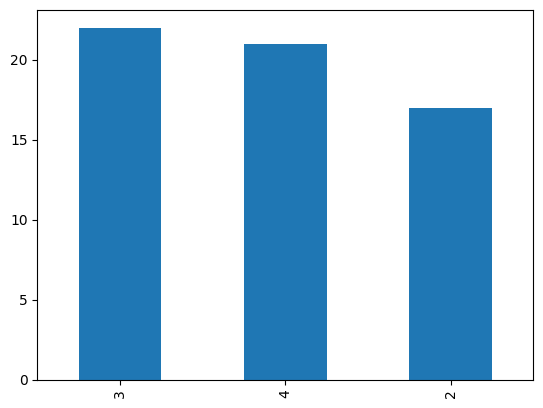

In [32]:
short_newsit_df['day'].value_counts().plot(kind='bar')

<Axes: >

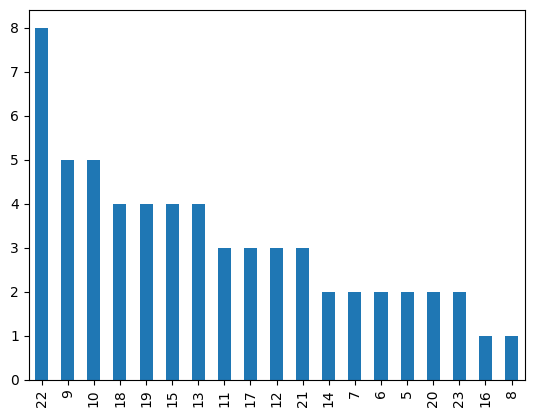

In [33]:
short_newsit_df['hour'].value_counts().plot(kind='bar')

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [35]:
short_newsit_df[short_newsit_df['day']==3]['full_text']


21    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419: Αυτοι ειναι ...
22    NewsIT Ελλαδα Βρεθηκαν 80 διαβατηρια που ειχαν...
23    NewsIT Ελλαδα Ξεσπα η φυλακισμενη μητερα της 1...
24    NewsIT Ελλαδα Η ψηφιακη τεχνολογια εκπαιδευει ...
25    NewsIT Ελλαδα Ανακοινωση απο το ΕΔΥΤΑ σχετικα ...
26    NewsIT Ελλαδα Superior Taste Award: Διακριση γ...
27    NewsIT Ελλαδα Παραλιες με Γαλαζιες σημαιες κον...
28    NewsIT Ελλαδα Κληρωση ΛΟΤΤΟ 2419 σημερα Σαββατ...
29    NewsIT Ελλαδα Μεζαπος Μανης: Το δαιδαλωδες λημ...
30    NewsIT Ελλαδα «Οι Πανελληνιες συνεκτιμωνται απ...
31    NewsIT Ελλαδα Εκλογες 2023: Που ψηφιζω, τι ισχ...
32    NewsIT Ελλαδα ΔΥΠΑ: 26 βρεφονηπιακοι σταθμοι σ...
33    NewsIT Ελλαδα Βιντεο ντοκουμεντο απο τη στιγμη...
34    NewsIT Ελλαδα Πανελλαδικες 2023 Μαθηματικα ΕΠΑ...
35    NewsIT Ελλαδα Ιδεες για μονοημερη εκδρομη σε 5...
36    NewsIT Ελλαδα Θεματα Πανελληνιων 2023 ΕΠΑΛ: Τι...
37    NewsIT Ελλαδα Κοινωνικος Τουρισμος 2023: Ποτε ...
38    NewsIT Ελλαδα Συνεληφθη 36χρονος στις Αχαρ

In [36]:
full_text = short_newsit_df[(short_newsit_df['day'] > 2) & (short_newsit_df['day'] < 5) ]['full_text'].str.cat(sep = ' ')

In [37]:
import spacy

In [38]:
nlp = spacy.load('el_core_news_sm')

In [39]:
list(nlp.Defaults.stop_words)[0:20]


['είθε',
 'ίδια',
 'να',
 'πόσην',
 'είσαι',
 'αλλοιώτικα',
 'έτερο',
 'καθεμίας',
 'οσουδήποτε',
 'τι',
 'ειδεμή',
 'επιπλέον',
 'συχνές',
 'τάχατε',
 'εν',
 'έχετε',
 'μεσώ',
 'πλέον',
 'πούθε',
 'τόσου']

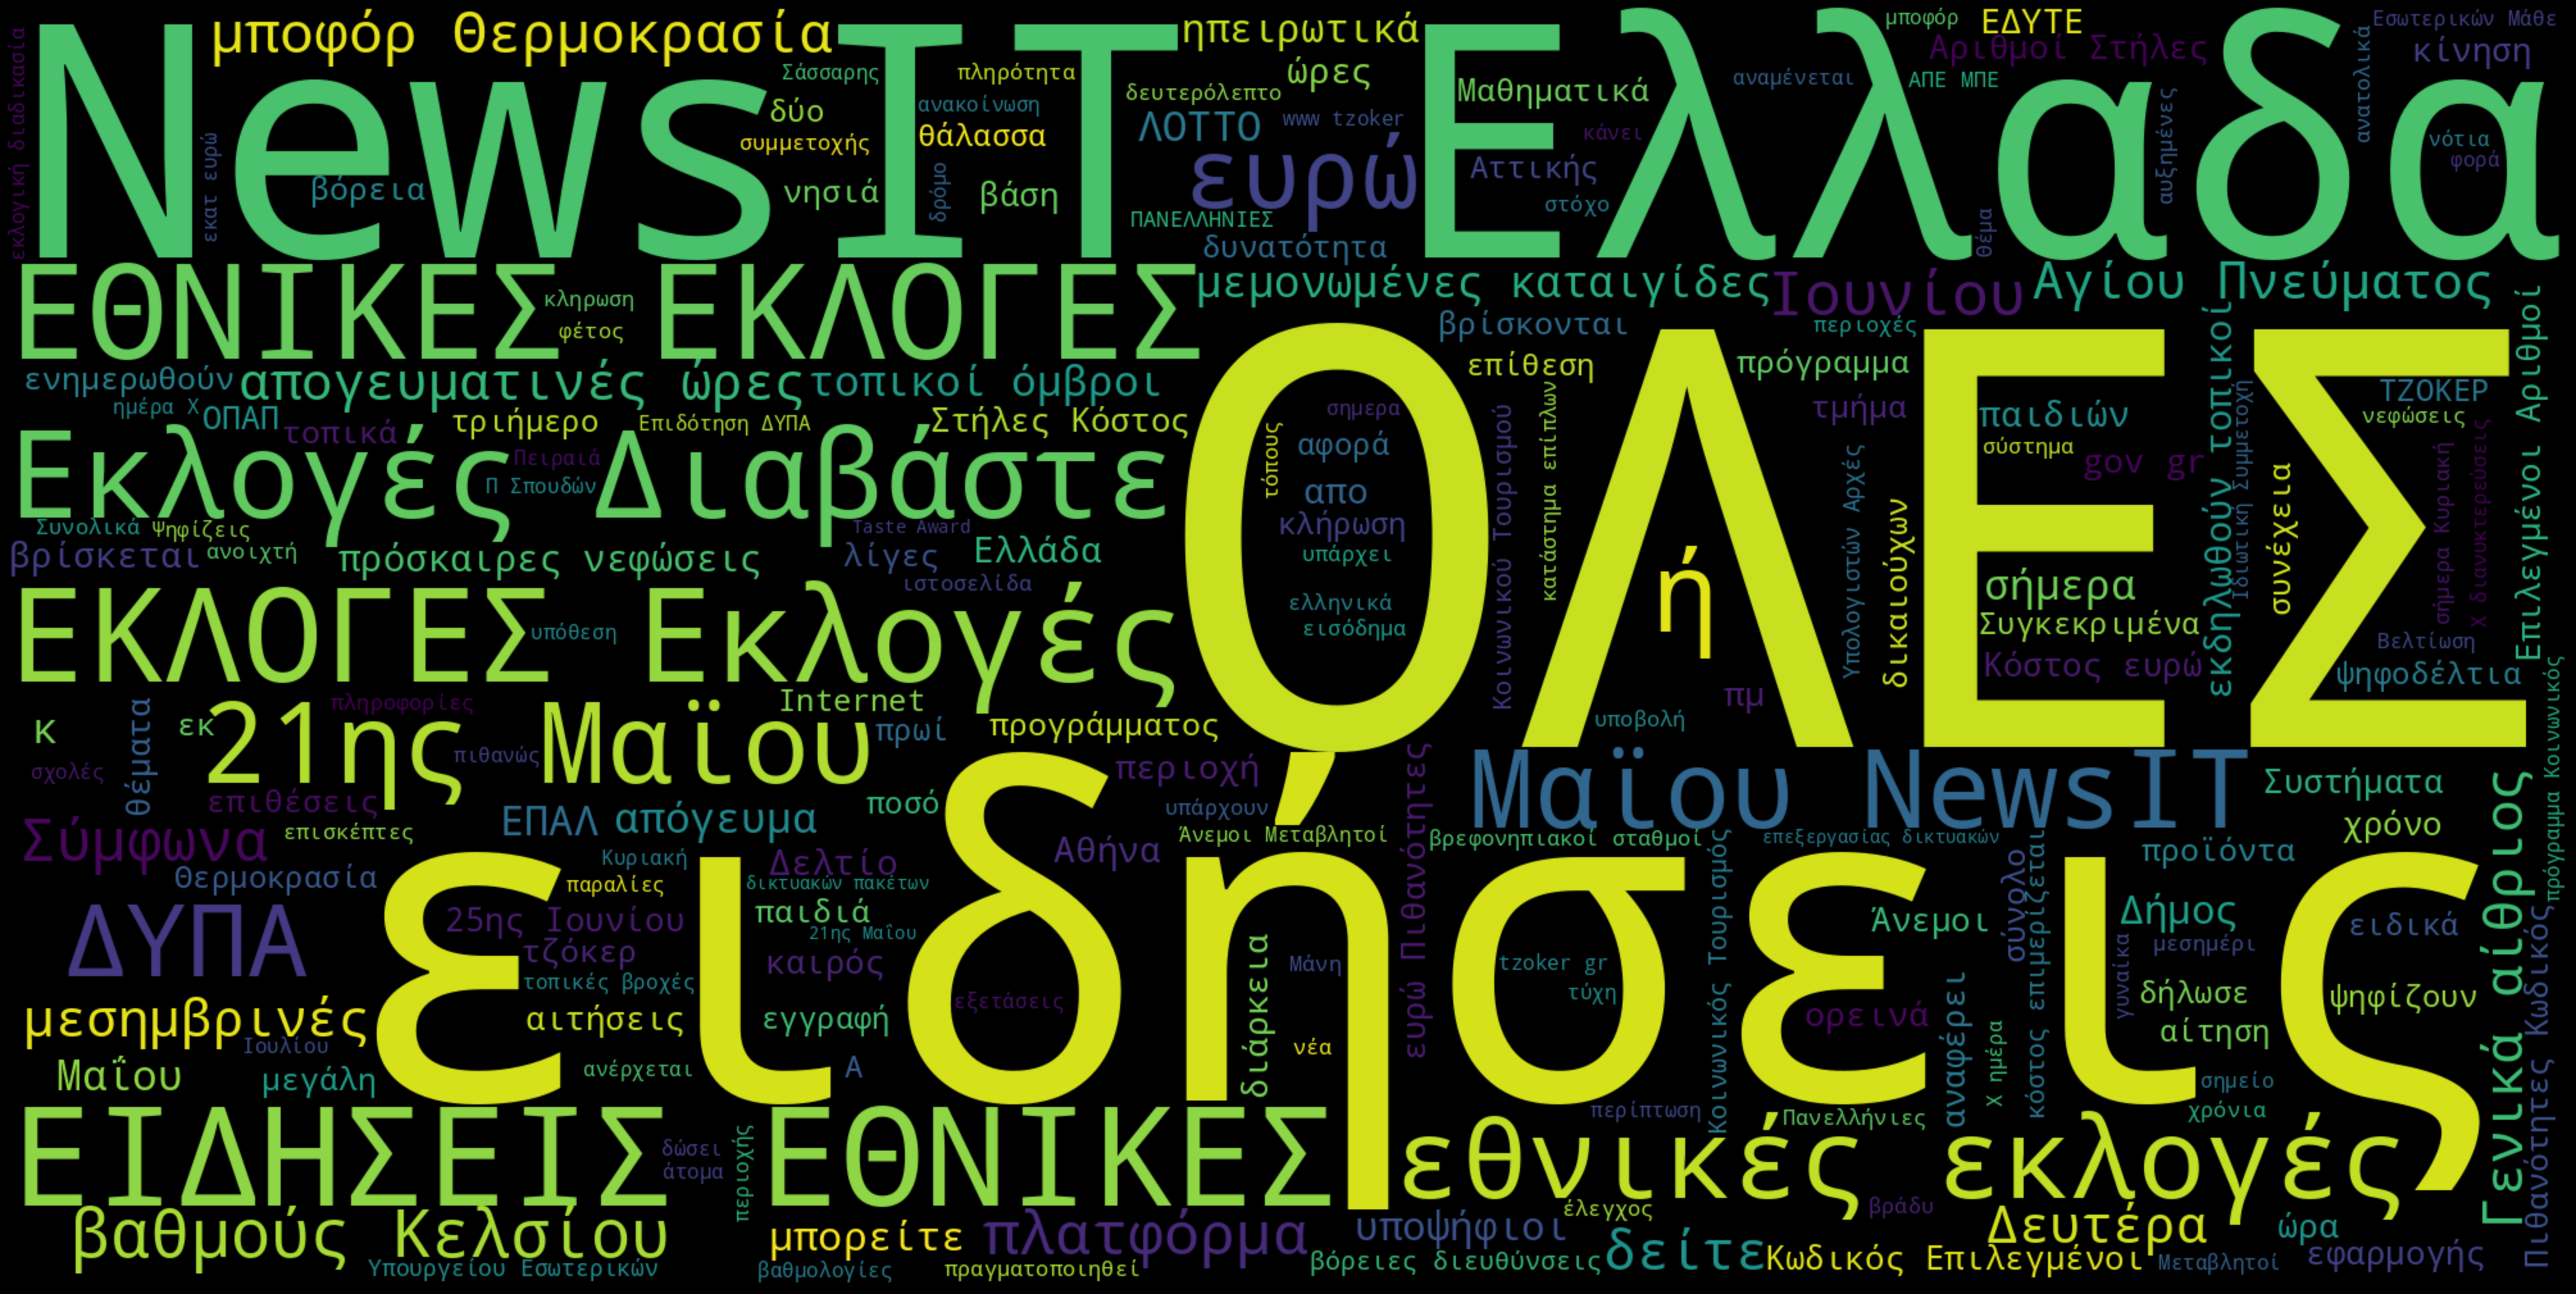

In [40]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Σύμφωνα με το συννεφόλεξο, για τις ημέρες 3-4/6/20213 στη κατηγορία του ειδησεογραφικού site «NewsIt», στη κατηγορία «Ελλάδα» αναπαρήχθησαν ειδήσεις για ποικίλα θέματα. Μερικές από τις θεματολογίες της κατηγορίας αφορούσαν το τριήμερο του Αγίου Πνεύματος, τη κίνηση, τις επερχόμενες εκλογές της 25ης Ιουνίου, το καιρό και τις Πανελλήνιες εξετάσεις.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv = CountVectorizer()

In [44]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [45]:
count_vector.shape

(60, 5188)

In [46]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [48]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [49]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [51]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [52]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,036,04,05,06,07,...,ἐκκέχυται,ἐλέησον,ἐπιφοιτήσει,ἑνὶ,ἑορτάζομεν,ἡμέρᾳ,ἡμᾶς,ἡμῶν,ἤματι,ὀγδόῃ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2023,21ης,30,newsit,βαθμούς,διαβάστε,εθνικές,εθνικες,ειδήσεις,ειδησεις,εκλογές,εκλογες,ελλαδα,ευρώ,θερμοκρασία,ιουνίου,μαϊου,μποφόρ,ολες,ώρες
0,3,1,0,1,0,1,1,1,1,1,2,1,1,0,0,1,1,0,1,0
1,6,1,0,1,0,1,1,1,1,1,2,1,1,1,0,0,1,0,1,0
2,4,1,0,1,0,1,1,1,1,1,2,1,1,0,0,0,1,0,1,1
3,3,1,2,1,11,2,1,1,1,1,2,1,1,0,9,0,1,9,1,5
4,3,1,0,1,0,1,1,1,1,1,2,1,1,0,0,0,1,0,1,0


In [54]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,000 ευρώ,06 2023,2023 διαβάστε,2023 εκλογές,21ης μαϊου,newsit ελλαδα,αγίου πνεύματος,βαθμούς κελσίου,διαβάστε ειδήσεις,εθνικές εκλογές,εθνικες εκλογες,ειδήσεις εθνικές,ειδησεις εθνικες,εκλογές 2023,εκλογές 21ης,εκλογες 2023,μαϊου 2023,μεμονωμένες καταιγίδες,μποφόρ θερμοκρασία,ολες ειδησεις
0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1
1,1,3,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0,1,1,1,1,1,9,1,1,1,1,1,1,1,1,1,3,9,1
4,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1


In [55]:
results.sum(axis =0).sort_values(ascending = False)

εκλογές 21ης              62
εκλογες 2023              61
newsit ελλαδα             60
εθνικες εκλογες           59
εθνικές εκλογές           59
μαϊου 2023                59
εκλογές 2023              59
ειδησεις εθνικες          59
ειδήσεις εθνικές          59
ολες ειδησεις             59
διαβάστε ειδήσεις         59
21ης μαϊου                59
2023 εκλογές              59
2023 διαβάστε             59
βαθμούς κελσίου           39
μποφόρ θερμοκρασία        32
000 ευρώ                  31
μεμονωμένες καταιγίδες    24
06 2023                   23
αγίου πνεύματος           23
dtype: int64

In [56]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

εκλογές 21ης       62
εκλογες 2023       61
newsit ελλαδα      60
εθνικες εκλογες    59
εθνικές εκλογές    59
dtype: int64

In [57]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['εκλογές', 'εθνικές', 'μαΐου', 'ελλαδα'])
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,εθνικές,μαΐου,ελλαδα
0,2,1,1,1
1,2,1,0,1
2,2,1,0,1
3,2,1,0,1
4,2,1,0,1


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_newsit_df['full_text'])

In [60]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,02,04,06,08,10,100,12,12χρονης,...,χώρα,χώρας,ψηφίζεις,ψηφίζουν,ψηφοδέλτια,ψύξης,όμβροι,όμβρους,ώρα,ώρες
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
1,0.000000,0.065035,0.0,0.254359,0.189427,0.0,0.069303,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.115111,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.089901
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.029171,0.0,0.0,0.0,0.0,0.0,0.161363,0.0,0.00000,0.113914
4,0.103702,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.132783,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.22764,0.000000


In [61]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.05463278 0.13186761 0.02580504 0.41601026 0.01736533
  0.1507547  0.03758059 0.18694085 0.11565767 0.13129254 0.05076062
  0.07895225 0.13355915 0.04984138 0.16161562 0.18834013 0.04623594
  0.03525392 0.07188355 0.03388081 0.03532234 0.228606   0.10058297
  0.08331012 0.11561062 0.03768516 0.03811211 0.02976254 0.08045862
  0.1172519  0.20676267 0.04610896 0.05355263 0.08164439 0.02574689
  0.09084827 0.034824   0.28979523 0.03460106 0.06756929 0.0854857
  0.04455817 0.07597879 0.19060921 0.1841566  0.28801042 0.07948938
  0.02490966 0.18502013 0.08870315 0.08921031 0.06000024 0.04530027
  0.04941802 0.19054816 0.04092012 0.03067504 0.0503718  0.13303036]]


In [62]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

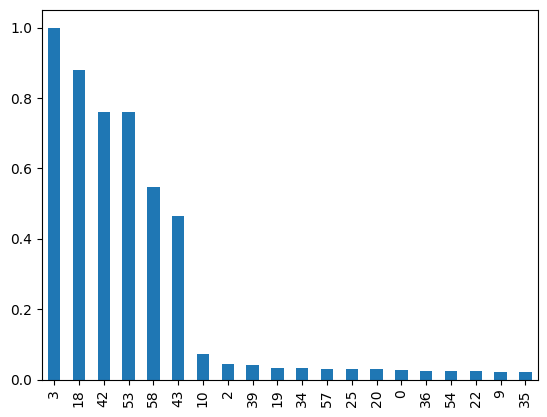

In [63]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

Σύμφωνα με το γράφημα, το 4ο και το 19ο άρθρο παρουσιάζουν αρκετές ομοιότητες ως προς το περιεχόμενό τους.

In [64]:
short_newsit_df['full_text'].loc[3]

'NewsIT Ελλαδα Καιρος αυριο: Με 30αρια ανημερα του Αγιου Πνευματος – Η προγνωση της ΕΜΥ Διαβάστε πώς θα είναι ο καιρός αύριο, ανήμερα του Αγίου Πνεύματος, σύμφωνα με την πρόγνωση της Εθνικής Μετεωρολογικής Υπηρεσίας (ΕΜΥ). Γενικά αίθριος προβλέπεται ο καιρός στη χώρα, με πρόσκαιρες νεφώσεις το μεσημέρι και το απόγευμα στα ηπειρωτικά, οπότε στα ορεινά κυρίως της Μακεδονίας και της Ηπείρου, θα εκδηλωθούν τοπικοί όμβροι και πιθανώς στα βόρεια μεμονωμένες καταιγίδες.Η ορατότητα τις πρωινές ώρες στα δυτικά και βόρεια ηπειρωτικά θα είναι τοπικά περιορισμένη και πιθανόν να σχηματιστούν ομίχλες.  Οι άνεμοι στα δυτικά θα είναι μεταβλητοί ασθενείς, στα ανατολικά θα πνέουν βόρειοι 3 με 5 και στο Αιγαίο τοπικά 6 μποφόρ.Η θερμοκρασία δεν θα σημειώσει αξιόλογη μεταβολή και θα φτάσει στα ηπειρωτικά τους 28 με 29 και κατά τόπους τους 30 βαθμούς και στα νησιά τους 25 με 27 βαθμούς Κελσίου. ΑΤΤΙΚΗΚαιρός: Γενικά αίθριος με αραιές νεφώσεις από το μεσημέρι.Άνεμοι: Βόρειοι βορειοανατολικοί 3 με 5 και στα αν

In [65]:
short_newsit_df['full_text'].loc[18]

'NewsIT Ελλαδα Καλος αναμενεται ο καιρος σημερα με θερμοκρασιες στα επιπεδα Ιουνιου - Που αναμενονται βροχες Καλός αναμένεται να είναι σήμερα Κυριακή (4.6.2023) ο καιρός με τη θερμοκρασία να βρίσκεται σε επίπεδα Ιουνίου ωστόσο να μην λείπουν οι συννεφιές και οι τοπικές βροχές σε κάποιες περιοχές. Ο καιρός πιθανότατα δεν θα είναι τόσο καλοκαιρινός στη Μακεδονία και τη Θεσσαλία αφού υπάρχει πιθανότητα τοπικών βροχών αλλά και καταιγίδων λίγο πριν το μεσημέρι της Κυριακής.\xa0  Στη Μακεδονία και τη Θεσσαλία νεφώσεις παροδικά αυξημένες με τοπικές βροχές ή όμβρους και από τις προμεσημβρινές ώρες σποραδικές καταιγίδες. Στην υπόλοιπη χώρα γενικά αίθριος καιρός με πρόσκαιρες νεφώσεις τις μεσημβρινές και απογευματινές ώρες κυρίως στα ηπειρωτικά όπου θα εκδηλωθούν τοπικοί όμβροι και στα ορεινά μεμονωμένες καταιγίδες. Η ορατότητα τις πρωινές και βραδινές ώρες κυρίως στα δυτικά και βόρεια ηπειρωτικά θα είναι τοπικά περιορισμένη και πιθανώς να σχηματιστεί κατά τόπους ομίχλη.  Οι άνεμοι θα πνέουν από

In [66]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

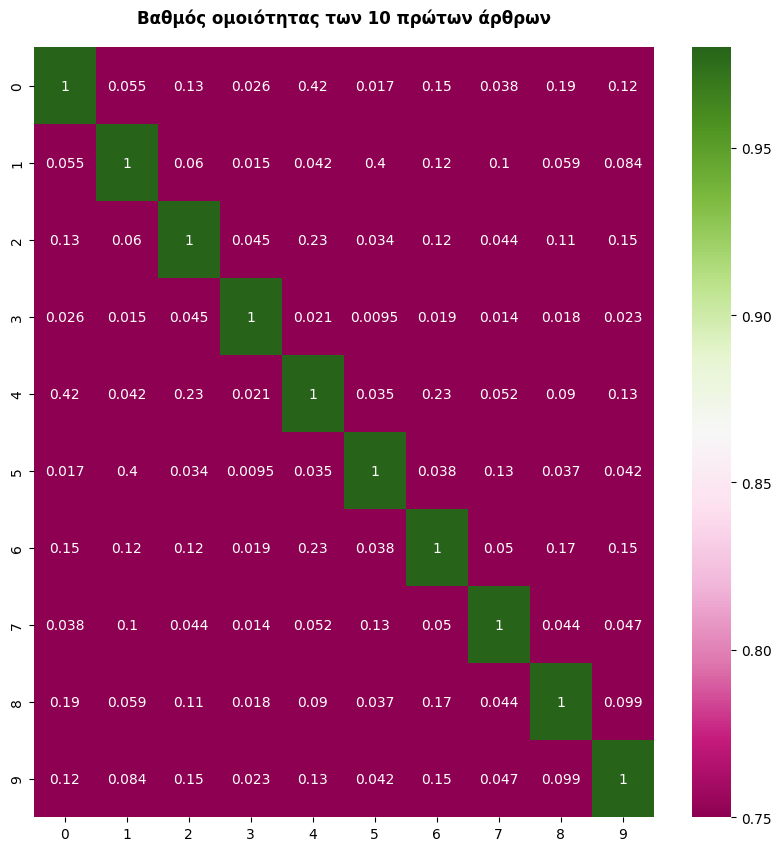

In [69]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")


**ΑΣΚΗΣΗ ΜΕ 2 SITE**

In [70]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Homework 9 Tsalla Vasilikh 2 site.csv', index=False)

In [71]:
kathimerini_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kathimerini.gr-MAY23.csv')

In [75]:
kathimerini_teasers_df

,site,url,date,section,title,author,text
0,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-01,ΚΟΣΜΟΣ,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,Newsroom,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,kathimerini.gr,https://www.kathimerini.gr/society/562396447/p...,2023-05-01,ΚΟΙΝΩΝΙΑ,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,Newsroom,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,kathimerini.gr,https://www.kathimerini.gr/society/562396426/c...,2023-05-01,ΚΟΙΝΩΝΙΑ,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",Newsroom,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,kathimerini.gr,https://www.kathimerini.gr/world/562396435/ern...,2023-05-01,ΚΟΣΜΟΣ,Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλαμικού ...,Newsroom,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,kathimerini.gr,https://www.kathimerini.gr/politics/562396552/...,2023-05-01,ΠΟΛΙΤΙΚΗ,Σκέρτσος για Πρωτομαγιά: Οι τέσσερις προϋποθέσ...,Newsroom,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...
...,...,...,...,...,...,...,...
3689,kathimerini.gr,https://www.kathimerini.gr/politics/562449514/...,2023-05-31,ΠΟΛΙΤΙΚΗ,ΣΥΡΙΖΑ: Ο κ. Μητσοτάκης υιοθετεί την ακραία το...,Newsroom,"«Με τον πλέον επίσημο τρόπο, ο κ. Μητσοτάκης, ..."
3690,kathimerini.gr,https://www.kathimerini.gr/society/562449823/v...,2023-05-31,ΚΟΙΝΩΝΙΑ,"Βρίζουν, κορνάρουν, τρέχουν – Road rage στους ...",Δέσποινα Κόντη,"Βρίζουν, κορνάρουν άσκοπα, τρέχουν – ενίοτε κα..."
3691,kathimerini.gr,https://www.kathimerini.gr/culture/562449649/i...,2023-05-31,ΠΟΛΙΤΙΣΜΟΣ,Ιαπωνικοί θησαυροί στην Κρήτη,Ξένια Γεωργιάδου,"Η Ιαπωνία, ένα μικρό νησιωτικό έθνος στο ανατο..."
3692,kathimerini.gr,https://www.kathimerini.gr/politics/562449196/...,2023-05-31,ΠΟΛΙΤΙΚΗ,Μητσοτάκης: Ξεκινάμε από την αρχή ώστε να είμα...,Newsroom,Από το Πέραμα Μυλοποτάμου στο Ρέθυμνο ξεκίνησε...


In [76]:
cv = CountVectorizer()

In [78]:
count_vector = cv.fit_transform(kathimerini_teasers_df['text'])

In [79]:
count_vector.shape

(3694, 97636)

In [73]:
newsit_text = short_newsit_df['full_text'].str.cat(sep = ' ')

In [82]:
kathimerini_text = kathimerini_teasers_df['text'].str.cat(sep = ' ')

In [87]:
two_sites_list = []
newsitD = {'site' : 'newsit.gr', 'text' : 'newsit_text'}
two_sites_list.append(newsitD)
kathimeriniD = {'site' : 'kathimerini.gr', 'text' : 'kathimerini_text'}
two_sites_list.append(kathimeriniD)
two_sites_df = pd.DataFrame(two_sites_list)

In [88]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [90]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

([<matplotlib.axis.YTick at 0x7f94d6607040>,
 [Text(0, 0, 'newsit.gr'), Text(0, 1, 'kathimerini.gr')])

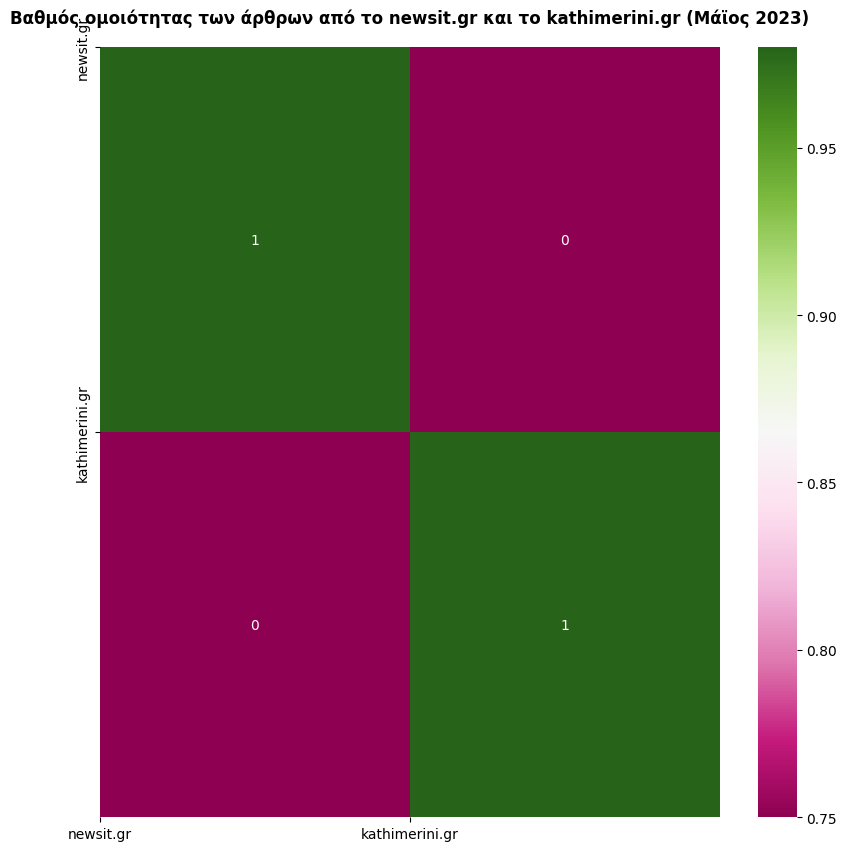

In [92]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το newsit.gr και το kathimerini.gr (Μάϊος 2023)', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['newsit.gr', 'kathimerini.gr'])
plt.yticks([0, 1], ['newsit.gr', 'kathimerini.gr'])

Τα δύο άρθρα δεν παρουσιάζουν κανένα κοινό σημείο καθώς, έχουμε ζητήσει δεδομένα από 2 διαφορετικούς μήνες. Τον Μάιο από το site 'Kathimerini.gr' και τον Ιούνιο (3-4/6) από το 'newsit.gr'.